# Titanic: análise exploratória de dados

Neste notebook, vamos analisar o famoso conjunto de dados do Titanic, disponível no Kaggle. O conjunto de dados se destina ao aprendizado de máquina supervisionado, mas faremos apenas algumas análises exploratórias aqui.

Tentaremos responder às seguintes perguntas:

- Quem eram os passageiros do Titanic? (idade, sexo, classe .. etc)
- Em que convés estavam os passageiros e como isso se relaciona com a classe deles?
- De onde vieram os passageiros?
- Quem estava sozinho e quem estava com a família?
- Que fatores ajudaram alguém a sobreviver ao naufrágio?

In [192]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import folium

O primeiro passo é a obtenção dos dados do Titanic. Os dados estão disponíveis em diversas plataformas, mas aqui eu obtive os dados do Kaggle. Os dados do Kaggle estão divididos em treino e teste, já preparados para Machine Learning. Para esta análise exploratória, vou usar apenas os dados de treino que estão completos com os dados dos sobreviventes.

In [193]:
# dados disponíveis no Kaggle, obtidos com a inscrição no site
titanic = pd.read_csv('train.csv')

In [194]:
#verificando o número de colunas e linhas
titanic.shape

(891, 12)

In [195]:
# visualizando o dataframe
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [196]:
#Informação sobre o dataset 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Acima podemos ver que faltam muitas informações no conjunto de dados para a coluna "Cabin" (cabine). Precisamos lidar com isso quando usarmos os dados da cabine.

- Outras informações parecem estar completas, exceto por alguns dados faltantes em "Age" (idade).

In [197]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- O método "describe" do Pandas é muito útil, rapidamente nos fornecendo algumas estatísticas agregadas para o conjunto de dados.

- Um número 1 na coluna "Survived" significa que a pessoa sobreviveu, enquanto um número 0 significa que ela morreu. Olhando para a média, podemos dizer que apenas ~ 38% das pessoas sobreviveram ao naufrágio.

## Quem eram os passageiros do Titanic?

Apresentando algumas informações demográficas dos passageiros

In [198]:
rcParams['figure.figsize'] = 9,5

In [199]:
sns.set_theme(style="whitegrid")

Vamos criar um "countplot" com o Seaborn para visualizar o número de passageiras e passageiros.

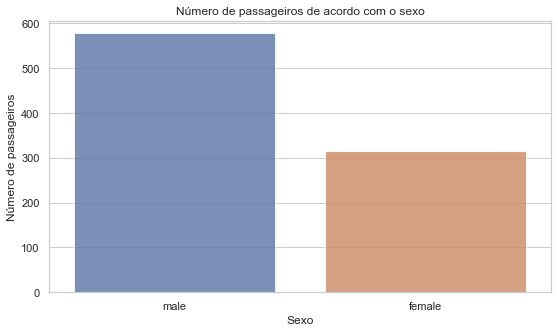

In [200]:
g = sns.countplot(x='Sex', data=titanic, alpha=0.8) 
plt.xlabel("Sexo")
plt.ylabel("Número de passageiros")
plt.title("Número de passageiros de acordo com o sexo")
plt.show(g)

- Havia consideravelmente mais passageiros do sexo masculino a bordo, o que era esperado dado o contexto histórico.

Em seguida, vamos dar uma olhada em como os passageiros foram divididos entre as diferentes classes.

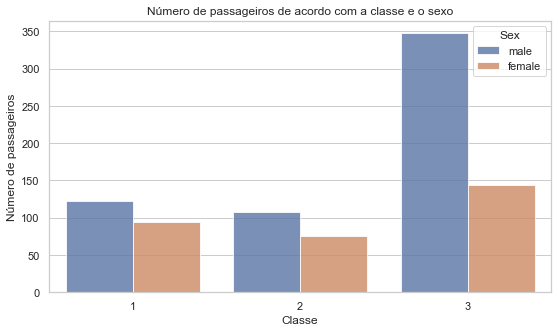

In [201]:
g = sns.countplot(x='Pclass', data=titanic, hue='Sex', alpha=0.8) 
plt.xlabel("Classe")
plt.ylabel("Número de passageiros")
plt.title("Número de passageiros de acordo com a classe e o sexo")
plt.show(g)

- O atributo "Pclass" é uma forma de obter a classe socioeconômica de uma pessoa. Passageiros da primeira classe tinham poder econômico maior do que passageiros da segunda e terceira classe.
- Podemos ver que havia muito mais passageiros na terceira classe, indicando um status sócio-econômico mais baixo, e que a maioria era do sexo masculino.

Outro dado interessante é o número de crianças à bordo. Podemos dividir os passageiros em mulheres, homens e crianças e visualizar a sua distribuição.

In [202]:
#Função para detectar se uma pessoa era do sexo feminino, masculino ou era uma criança
def mul_hom_cri(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    
    return 'child' if age < 16 else sex

#Usando o Pandas para aplicar o método para criar uma nova coluna "Person"
titanic['Person'] = titanic.apply(mul_hom_cri, axis=1)

In [203]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [204]:
#Número total de cada categoria
print(titanic['Person'].value_counts())

male      537
female    271
child      83
Name: Person, dtype: int64


Visualizando os dados que acabamos de criar:

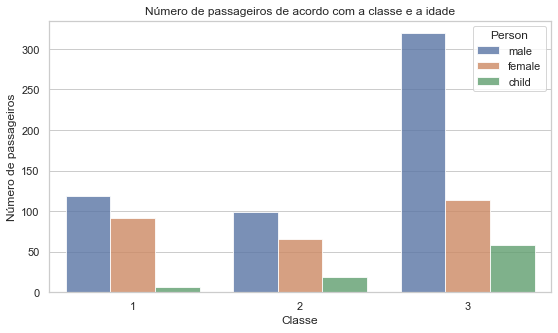

In [205]:
g = sns.countplot(x='Pclass', data=titanic, hue='Person', alpha=0.8) 
plt.xlabel("Classe")
plt.ylabel("Número de passageiros")
plt.title("Número de passageiros de acordo com a classe e a idade")
plt.show(g)

- O que é interessante notar acima, é que na 3ª classe há muito mais passageiros homens do que mulheres ou crianças, do que em qualquer outra classe. Isso levará a uma análise interessante mais tarde.

Agora podemos criar um histograma a partir do conjunto de dados, para verificar a distribuição de passageiros de diferentes faixas etárias.

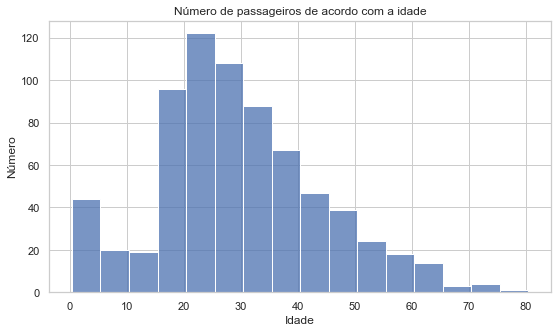

In [206]:
h = sns.histplot(data=titanic, x="Age", binwidth=5)
plt.xlabel("Idade")
plt.ylabel("Número")
plt.title("Número de passageiros de acordo com a idade")
plt.show(h)

- Podemos ver que a maioria dos passageiros eram jovens adultos, entre 20 e 35 anos.

Agora vamos ver como a distribuição da idade varia entre as classes.

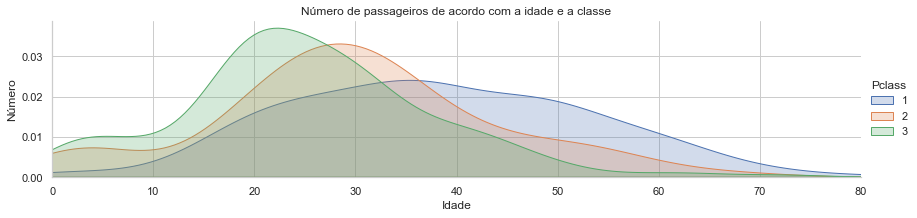

In [207]:
fig = sns.FacetGrid(titanic,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

plt.xlabel("Idade")
plt.ylabel("Número")
plt.title("Número de passageiros de acordo com a idade e a classe")
plt.show(fig)

- Podemos ver que os passageiros da primeira classe pertenciam mais aos grupos de meia idade, com poucos filhos.
- A segunda e a terceira classes tinham mais filhos, com relativamente menos pessoas mais velhas.

O próximo gráfico mostra o número de passageiros de acordo com a idade e o sexo

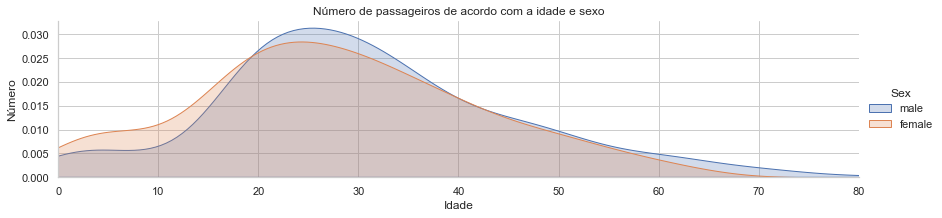

In [208]:
fig = sns.FacetGrid(titanic,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

plt.xlabel("Idade")
plt.ylabel("Número")
plt.title("Número de passageiros de acordo com a idade e sexo")
plt.show(fig)

- A distribuição por idade parece ser menos variada quando dividimos os passageiros por sexo, embora possamos dizer que há mais mulheres jovens do que homens jovens.

## Onde os passageiros embarcaram?

O Titanic partiu em sua viagem inaugural de Southampton, Inglaterra, para Nova Iorque, em 10 de abril de 1912, passando por Cherbourg-Octeville, na França, e por Queenstown, na Irlanda. 

O atributo "Embarked" contém dados do porto de embarcação dos passageiros (C = Cherbourg; Q = Queenstown; S = Southampton).

In [209]:
#Número total de cada de embarcados em cada porto
print(titanic['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Eu procurei manualmente pelas coordenadas de cada localidade: Southampton: 50.909696, -1.435662; Cherbourg: 49.644802, -1.605088; Queenstown: 51.848516, -8.300110.

As coordenadas foram plotadas em um mapa.

In [227]:
m = folium.Map(location=[50.9, -1.4], min_zoom = 6, max_zoom = 6, zoom_start = 6, tiles="Stamen Terrain", zoom_control = False)

folium.Marker(
    [50.909696, -1.435662], popup="<i>Southampton</i>", tooltip = 'Southampton').add_to(m)
folium.Marker(
    [49.644802, -1.605088], popup="<b>Cherbourg</b>", tooltip = 'Cherbourg').add_to(m)
folium.Marker(
    [51.848516, -8.300110], popup="<b>Queenstown</b>", tooltip = 'Queenstown').add_to(m)

m

Podemos também examinar o local de embarque de acordo com a sua classe.

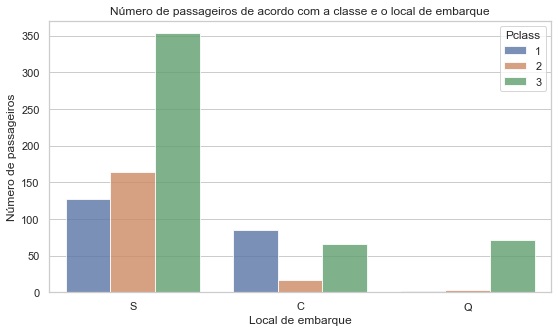

In [211]:
x = sns.countplot(x='Embarked', data=titanic, hue='Pclass', alpha=0.8) 
plt.xlabel("Local de embarque")
plt.ylabel("Número de passageiros")
plt.title("Número de passageiros de acordo com a classe e o local de embarque")
plt.show(x)

Podemos ver que a maioria dos passageiros embarcou em Southampton (incluindo Jack e Rose, no filme). O que também é interessante é que quase nenhum passageiro de primeira ou segunda classe embarcou em Queenstown, o que pode nos dizer algo sobre a situação socioeconômica da população de Queenstown.

## Em que convés estavam os passageiros e como isso se relaciona com a classe?

Vamos verificar se as pessoas pertencentes a classes superiores foram designadas a cabines em um convés (ou nível) superior do navio.

In [212]:
#vamor remover os dados faltantes para esta parte da visualização
deck = titanic.dropna(axis=0)

In [213]:
deck.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


Como podemos descobrir em qual deck um passageiro estava?

O atributo 'Cabin' contém esses dados. O número da cabine de um passageiro é uma combinação do convés em que ele estava e o número do quarto. Portanto, um passageiro no convés 'C' terá um número de cabine no formato CXXX, onde XXX pode ser o número do quarto. Devemos lembrar que na terceira classe o passageiro nem sempre possuía um quarto ou cabine designada a ele. A maior parte da informação está disponível apenas para a primeira e segunda classes.

Agora precisamos criar um método para extrair a primeira letra das informações da cabine e colocar em uma nova coluna chamada 'Level'.

In [214]:
deck['Level'] = deck['Cabin'].str[:1]
deck

<ipython-input-214-78df7044c76b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck['Level'] = deck['Cabin'].str[:1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,female,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,male,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,female,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,B


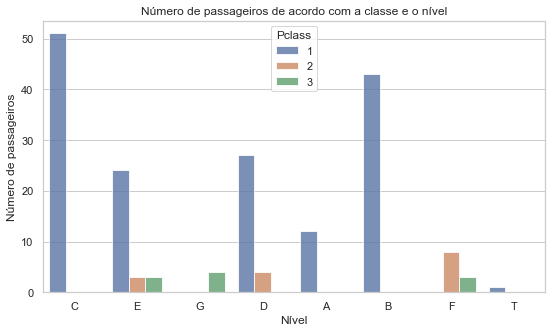

In [215]:
g = sns.countplot(x='Level', data=deck, hue='Pclass', alpha=0.8) 
plt.xlabel("Nível")
plt.ylabel("Número de passageiros")
plt.title("Número de passageiros de acordo com a classe e o nível")
plt.show(g)

Passageiros que pertenciam à primeira e segunda classes foram de fato designados para os andares superiores. Os decks A, B e C foram atribuídos apenas aos passageiros da primeira classe. Passageiros da segunda classe aparecem nos decks D, E e F, enquanto passageiros da terceira classe apenas à partir do nível E. No entanto, é bom lembrar que as informações sobre a cabine estão ausentes para mais de 3/4 dos nossos passageiros.

## Quem estava acompanhado da família?

In [216]:
#olhando novamente nossos dados
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


O atributo 'SibsSP' se refere ao número de irmãos (Sibs ou siblings) ou cônjuges (SP ou spouse) que um passageiro tinha à bordo. O atributo 'Parch' se refere ao número de pais ou filhos que acompanhavam o passageiro no navio.

Como o nosso interesse é apenas saber se um passageiro tinha algum familiar à bordo, podemos facilitar a nossa vida fazendo uma nova coluna para representar estes dados.

In [217]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

In [218]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,0


O número 0 na coluna 'Family' quer dizer que a pessoa estava sozinha no barco. Número acima de 0 indicam o número de familiares à bordo.

O próximo passo vai simplificar ainda mais, indicando apenas se a pessoa estava sozinha ou acompanhada durante a viagem.

In [221]:
titanic['Family'].loc[titanic['Family'] > 0] = 'accompanied'

titanic['Family'].loc[titanic['Family'] == 0] = 'alone'

C:\Users\Daniele\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [222]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,accompanied
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,accompanied
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,accompanied
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,accompanied
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,alone


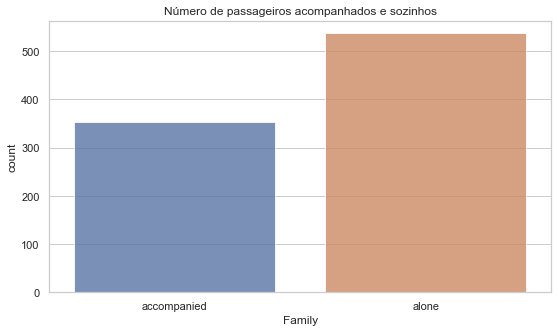

In [224]:
g = sns.countplot(x='Family', data=titanic, alpha=0.8) 
plt.xlabel("Family")
plt.title("Número de passageiros acompanhados e sozinhos")
plt.show(g)

O resultado é simples: a maioria estava desacompanhado durante a viagem.

Agora vamos subdividir os resultados pelo sexo.

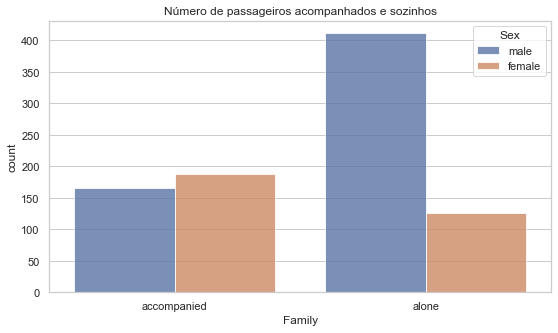

In [225]:
g = sns.countplot(x='Family', data=titanic, hue='Sex', alpha=0.8) 
plt.xlabel("Family")
plt.title("Número de passageiros acompanhados e sozinhos")
plt.show(g)

Como era esperado, a maioria das pessoas desacompanhadas era do sexo masculino.

## Quais foram os fatores que ajudaram na sobrevivência?

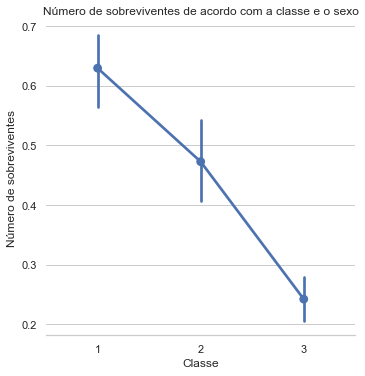

In [240]:
g = sns.catplot(x="Pclass", y="Survived", kind="point", data=titanic)
g.despine(left=True)

plt.xlabel("Classe")
plt.ylabel("Número de sobreviventes")
plt.title("Número de sobreviventes de acordo com a classe e o sexo")
plt.show(g)

Como esperado, passageiros nas classes inferiores tiveram uma menor chance de sobrevivência. 

Como essa change de sobrevivência se relaciona com o sexo? Como vimos anteriormente, a maioria dos passageiros na terceira classe era do sexo masculino. Mulheres e crianças realmente tiveram mais chances de sobreviver? Vamos dividir os passageiros por sexo no próximo gráfico.

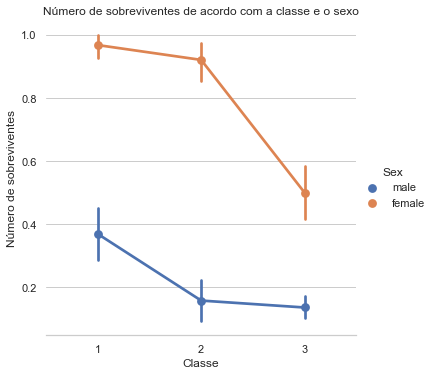

In [239]:
g = sns.catplot(x="Pclass", y="Survived", hue='Sex', kind="point", data=titanic)
g.despine(left=True)

plt.xlabel("Classe")
plt.ylabel("Número de sobreviventes")
plt.title("Número de sobreviventes de acordo com a classe e o sexo")
plt.show(g)

Aqui podemos ver claramente que havia uma chance maior de sobrevivência para as mulheres, especialmente da primeira e segunda classe.

Também podemos afirmar que as mulheres da terceira classe tiveram menores changes de sobrevivência.

Em todos os casos, os homens tiveram menor sobrevivência e menor chance de resgate.

Podemos também usar a nossa coluna 'Person' para visualizar a situação das crianças na embarcação.

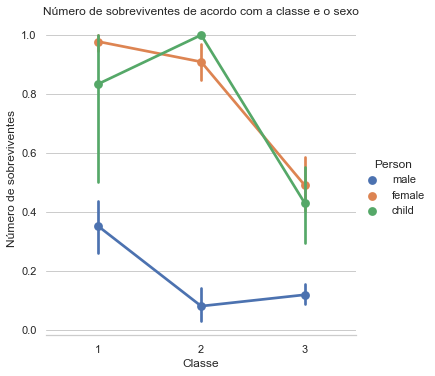

In [241]:
g = sns.catplot(x="Pclass", y="Survived", hue='Person', kind="point", data=titanic)
g.despine(left=True)

plt.xlabel("Classe")
plt.ylabel("Número de sobreviventes")
plt.title("Número de sobreviventes de acordo com a classe e o sexo")
plt.show(g)

Crianças tinham maiores chances de serem salvas, especialmente aquelas na primeira e na segunda classe.

Agora vamos plotar a relação entre idade e sobrevivência

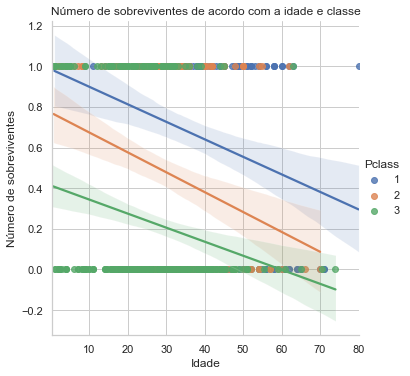

In [244]:
l = sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic)

plt.xlabel("Idade")
plt.ylabel("Número de sobreviventes")
plt.title("Número de sobreviventes de acordo com a idade e classe")
plt.show(l)

O gráfico mostra um consenso nos dados: quanto mais jovem, maior a chance de sobreviência e quanto mais velho, menor a chance de sobrevivência.